# House price prediction
Firstly, we'd better to analyze the data, we'll do from the four aspects:
1. Drop the useless columns
   1. Columns have too many Nan values
   2. Less correlate with house price column
2. Substitute the Nan value of useful columns

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#pd.set_option('display.max_columns', 500)

data_dictionary.txt
macro.csv
sample_submission.csv
test
test.csv
train
train.csv



In [2]:
train_dataset = pd.read_csv("../input/train.csv", parse_dates=['timestamp'])
test_dataset = pd.read_csv("../input/test.csv", parse_dates=['timestamp'])
macro_dataset = pd.read_csv("../input/macro.csv", parse_dates=['timestamp'])
train_dataset.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [3]:
print(train_dataset.columns)

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)


count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64


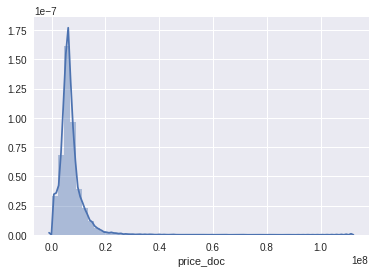

In [4]:
print(train_dataset['price_doc'].describe())
sns.distplot(train_dataset['price_doc'])

count    30471.000000
mean        15.609483
std          0.604575
min         11.512925
25%         15.371548
50%         15.651990
75%         15.931766
max         18.526041
Name: log_price, dtype: float64


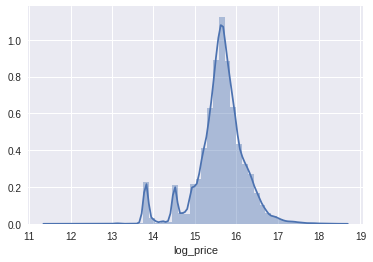

In [5]:
train_dataset['log_price'] = np.log(train_dataset['price_doc'])
print(train_dataset['log_price'].describe())
sns.distplot(train_dataset['log_price'])

In [6]:
train_l = train_dataset.copy()
train_l['Source'] = 'Train'
test_l = test_dataset.copy()
test_l['Source'] = 'Test'
all_data = pd.concat([train_l, test_l], ignore_index=True)

macro_dataset.columns = ['mac__' + c if c != 'timestamp' else 'timestamp' for c in macro_dataset.columns]
all_data = all_data.merge( macro_dataset, on='timestamp', how='left')
all_data

,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,...,mac__provision_retail_space_modern_sqm,mac__turnover_catering_per_cap,mac__theaters_viewers_per_1000_cap,mac__seats_theather_rfmin_per_100000_cap,mac__museum_visitis_per_100_cap,mac__bandwidth_sports,mac__population_reg_sports_share,mac__students_reg_sports_share,mac__apartment_build,mac__apartment_fund_sqm
0,18654,8945,9709,23603,11317,12286,9576,4677,4899,17508,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,13729,6800,6929,17700,8702,8998,6880,3414,3466,15164,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,11252,5336,5916,14884,7063,7821,5879,2784,3095,19401,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,24934,12152,12782,32063,15550,16513,13087,6442,6645,3292,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,11631,5408,6223,15237,7124,8113,5706,2724,2982,5164,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
5,4632,2233,2399,5866,2831,3035,2418,1194,1224,4851,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
6,4884,2377,2507,6510,3165,3345,2459,1218,1241,19445,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
7,18654,8945,9709,23603,11317,12286,9576,4677,4899,17508,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
8,12269,5782,6487,15510,7309,8201,6507,3051,3456,17662,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
9,17469,8387,9082,22071,10587,11484,9347,4541,4806,15929,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


In [7]:
all_data.dtypes.value_counts()

float64           216
int64             157
object             19
datetime64[ns]      1
dtype: int64

In [8]:
pd.concat?

In [ ]:
# As there are so many Nan, so let's watch the data without Nan to identify the value of them
train_dataset_org.loc[:,train_dataset_org.isnull().sum() == 0].head()

In [ ]:
# Show the shape of dataset
print(train_dataset_org.shape)

In [ ]:
# show datatype and Nan count
null_count = train_dataset_org.isnull().sum().sort_values(ascending = False)
null_percent = ( train_dataset_org.isnull().sum() / train_dataset_org.isnull().count()).sort_values(ascending = False)
data_type = train_dataset_org.dtypes.reindex(null_count.index)
null_info = pd.concat([data_type, null_count, null_percent], axis = 1, keys = ['data_type', 'count', 'percent'])
print(null_info)

In [ ]:
# check columns of dataset
print(len(train_dataset_org.columns.values))
print("=" * 50)
print(train_dataset_org.columns.values)

In [ ]:
# Let's look at the types of all columns values
train_dataset_org.dtypes.loc[:].unique()

In [ ]:
# show all object columns
train_dataset_org.dtypes.loc[train_dataset_org.dtypes == np.object]

In [ ]:
# show all float64 columnes
train_dataset_org.dtypes.loc[train_dataset_org.dtypes == np.float64]

In [ ]:
# show all int64 columns
train_dataset_org.dtypes.loc[train_dataset_org.dtypes == np.int64]

As shown above, there are three data types for all columns, let's list all columns of each data type:

In [ ]:
train_dataset_x_timestamp = train_dataset_org.drop(["id",timestamp"], axis = 1)
train_dataset_x_timestamp.head()

In [ ]:
# Data type is int64
train_dataset_org.loc[:, train_dataset_org.dtypes == np.int64].describe()

In [ ]:
# get all object columns
train_dataset_x_timestamp.loc[:,train_dataset_x_timestamp.dtypes == np.object].head()

In [ ]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)